In [2]:
## Imports

import sys, os
from pathlib import Path

parent_folder = str(Path.cwd().parents[1])
if parent_folder not in sys.path:
    sys.path.append(parent_folder)

from sigpy import mri
import scipy
import pickle
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import seaborn as sns
import sigpy as sp
import cupy as cp
import numpy as np
from sigpy.mri.app import TotalVariationRecon, L1WaveletRecon
from scipy.io import savemat
import twixtools
import matplotlib.pyplot as plt
from scipy.signal import medfilt
from scipy.signal import butter,filtfilt


## My files
from resp_signal_functions import resp_signal_all_slices, resp_signal_single_slice, resp_signal_center_sample_single_slice
from resp_signal_plot_functions import *
import gating_functions
import gating_visuals
from save_data_helpers import *
import recon_plot_helpers

In [4]:
gated_phase_images = read_pickle('/home/lilianae/projects/naf_clean/recons/subject2_mid0082/all_slices_phase_5gates_nufft/gated_images_phase_all_gates.pkl')
print(f'len(gated_phase_images) = {len(gated_phase_images)}')
print(f'gated_phase_images[0].shape = {gated_phase_images[0].shape}')

len(gated_phase_images) = 5
gated_phase_images[0].shape = (15, 58, 255, 255)


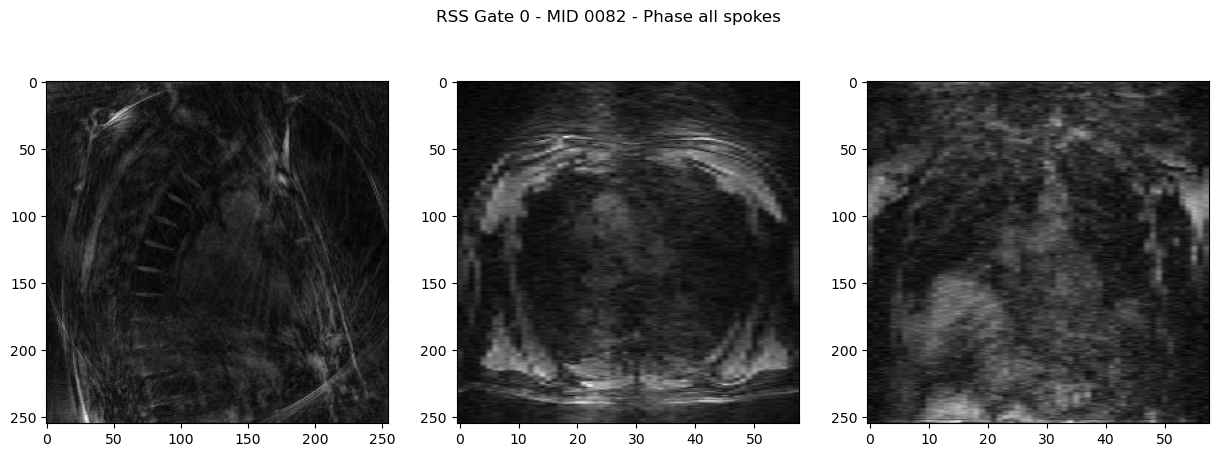

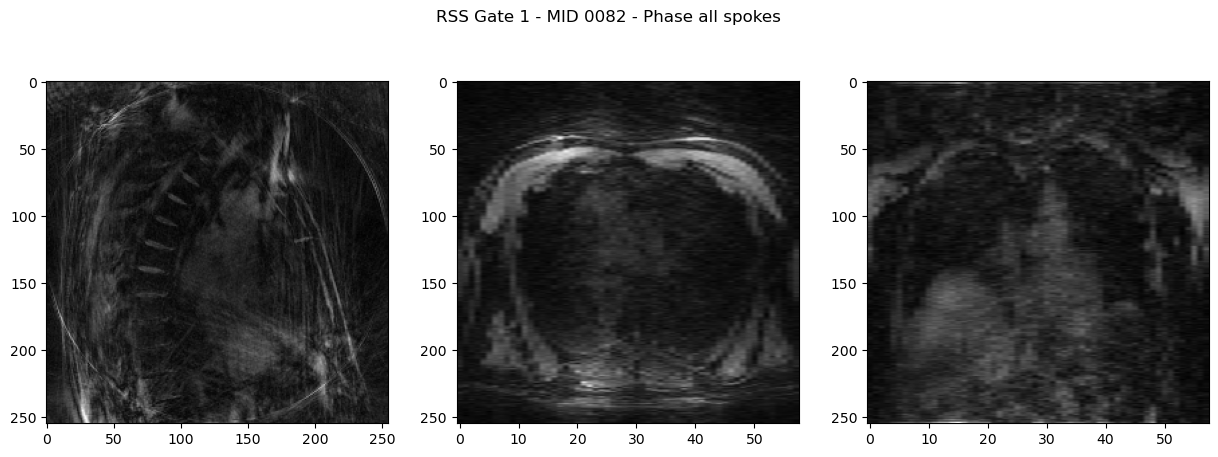

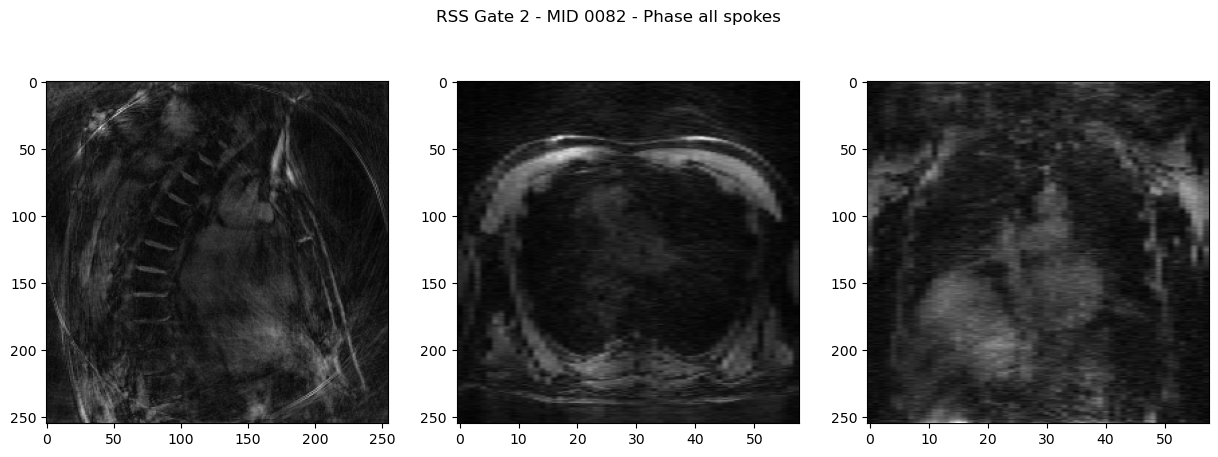

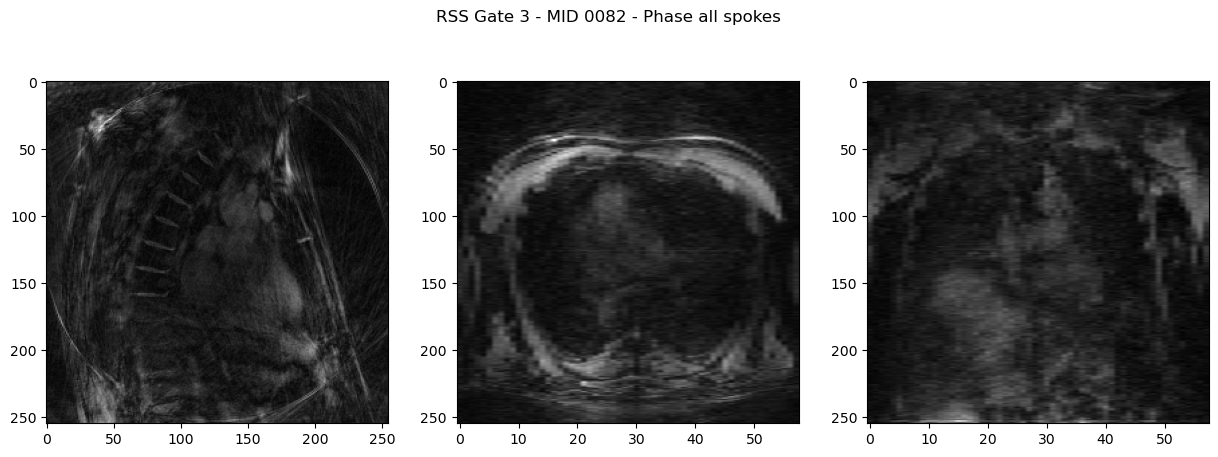

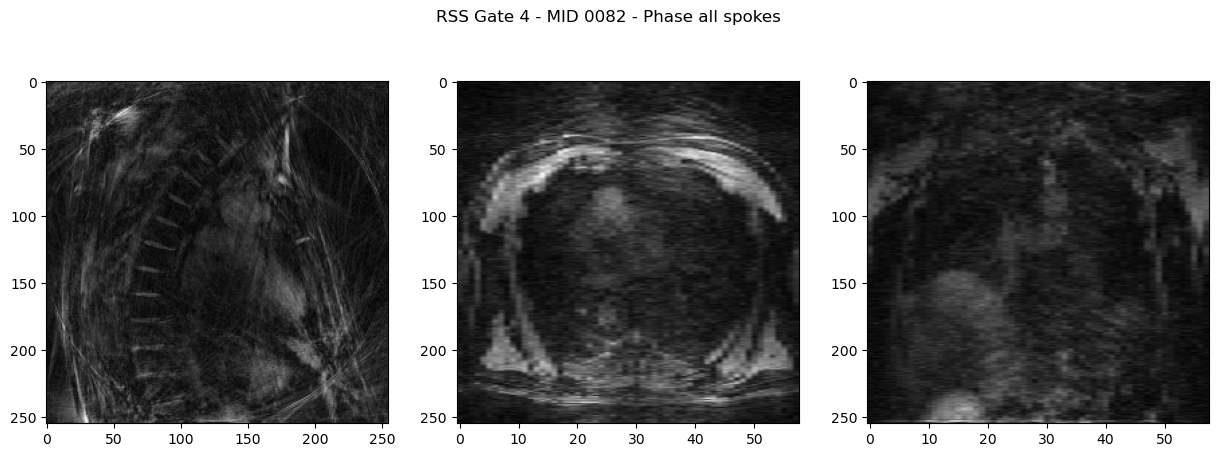

In [7]:
gated_recons = []
for i in range(len(gated_phase_images)):
    gate_image = recon_plot_helpers.calculate_rss_image(gated_phase_images[i])
    recon_plot_helpers.plot_recons_all_axes(gate_image, title=f"RSS Gate {i} - MID 0082 - Phase all spokes")
    gated_recons.append(gate_image)


In [10]:
recon_plot_helpers.make_gif(gated_recons, slice_axis=0, gif_name="saggital_phase_all_5gates_dur100", duration=100.0)

GIF saved as saggital_phase_all_5gates_dur100.gif
